In [ ]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


#1.Data and Preprocessing


###1.1 Load Data


In [ ]:
'''
# Detail mnist load_data function: 
https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/datasets/mnist.py
'''
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

###1.2 Explore Data

In [ ]:
type(train_data)

numpy.ndarray

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
test_data.shape

(10000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

labels chưa được one-hot encoding => sử dụng hàm keras.losses.SparseCategoricalCrossentropy()

###1.3 Normalize


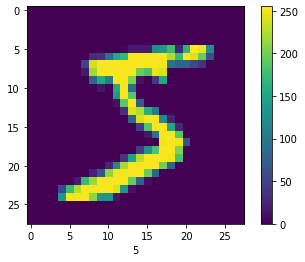

In [ ]:
plt.imshow(train_data[0])
plt.colorbar()
plt.xlabel(train_labels[0])
plt.show()

---

In [ ]:
def Normalize(train_data, test_data):
  
  train_data = train_data / 255
  test_data = test_data / 255

  return train_data, test_data

In [ ]:
train_data, test_data = Normalize(train_data, test_data)

---

Xác minh rằng dữ liệu ở đúng định dạng sau khi Preprocess

Ở đây là sau khi chuyển range [0,255] -> [0,1]

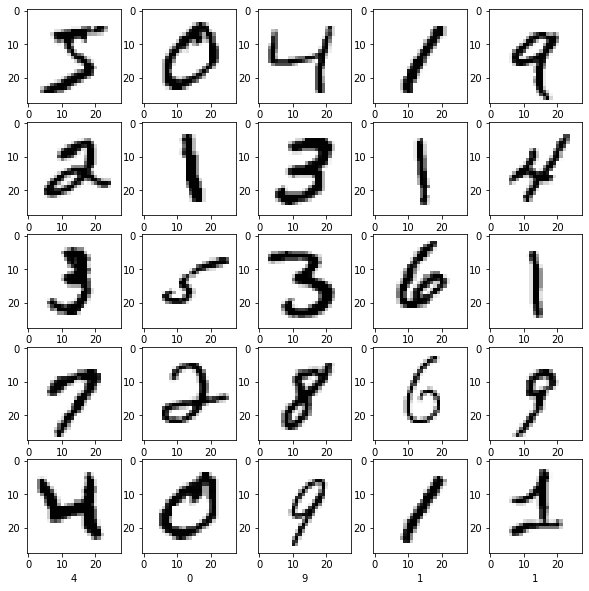

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # (nrows, ncols, index)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    # plt.colorbar() Hiện colorbar
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
train_data.dtype

dtype('float64')

###1.4 Shuffle(Xáo trộn) data train

Vẫn giữ nguyên số lượng, chỉ random trộn ngẫu nhiên dữ liệu


In [ ]:
'''
Với kiểu dữ liệu numpy và ít dữ liệu bạn có thể làm như thế này.
'''
seed = 113
rng = np.random.RandomState(seed) # Dữ nguyên trạng thái random với seed bất kỳ
indices = np.arange(len(train_data))
rng.shuffle(indices)
train_data = train_data[indices]
train_labels = train_labels[indices]

#2.Create Model

1 layer input + 2 Hidden layer with 64 node + 1 output layer

In [ ]:
model = keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_data[0].shape),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

*   Loss function: SparseCategoricalCrossentropy [Help link](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
*   optimizer: Adam [Help link](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
             'accuracy',
    ])


#3.Fit Model

In [ ]:
run = model.fit(train_data, train_labels, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.9103 - val_loss: 0.1743 - val_accuracy: 0.9485
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1398 - accuracy: 0.9584 - val_loss: 0.1337 - val_accuracy: 0.9576
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1008 - accuracy: 0.9699 - val_loss: 0.1387 - val_accuracy: 0.9576
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0799 - accuracy: 0.9751 - val_loss: 0.1075 - val_accuracy: 0.9663
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.1149 - val_accuracy: 0.9671
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0534 - accuracy: 0.9839 - val_loss: 0.0990 - val_accuracy: 0.9694
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.1044 - val_accuracy:

#4.Evaluate Model

### 4.1 Vizualize

In [ ]:
run.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(run.history['loss'])

list

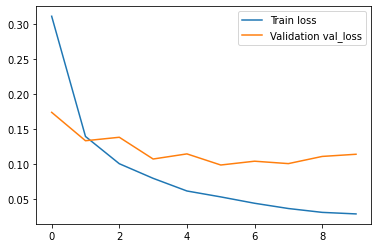

In [ ]:
plt.plot(run.history['loss'], label='Train loss')
plt.plot(run.history['val_loss'], label = 'Validation val_loss')
plt.legend()

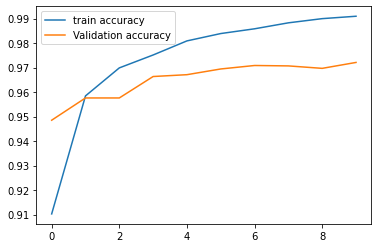

In [ ]:
plt.plot(run.history['accuracy'], label='train accuracy')
plt.plot(run.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [ ]:
# Đánh giá trung bình độ chính xác của data
print("Train score:", model.evaluate(train_data, train_labels))
print("Test score:", model.evaluate(test_data, test_labels))

1875/1875 [==============================] - 2s 960us/step - loss: 0.0373 - accuracy: 0.9899
Train score: [0.03727945312857628, 0.9898999929428101]
313/313 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9751
Test score: [0.09552209824323654, 0.9750999808311462]


Confusion matrix, without normalization
[[ 969    1    0    1    0    2    4    1    2    0]
 [   0 1130    2    1    0    1    0    0    1    0]
 [   5    2  999    4    4    0    3    5   10    0]
 [   0    0    4  981    0    8    2    2    7    6]
 [   1    0    0    0  962    0    7    2    0   10]
 [   2    1    0    8    1  865    5    0    9    1]
 [   4    1    0    1    2    9  937    0    4    0]
 [   1    2    8    4    1    1    0  995    4   12]
 [   3    1    2    5    2    3    0    2  952    4]
 [   5    2    0   11   11    6    0    6    7  961]]


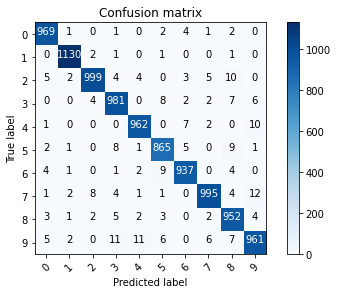

In [ ]:
# Ma trận nhầm lẫn

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(test_data).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

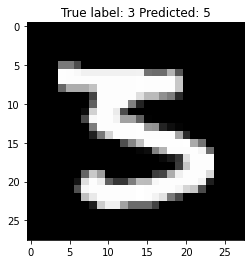

In [ ]:
# Show ảnh ngẫu nhiên bị đoán sai
misclassified_idx = np.where(p_test != test_labels)[0] # Trả về index của phần tử dự đoán sai 
i = np.random.choice(misclassified_idx)
plt.imshow(test_data[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (test_labels[i], p_test[i]));

###4.2 Making Predictions

In [ ]:
y_predict = model.predict(test_data)
y_predict[0]

array([7.5793860e-10, 1.9352636e-10, 7.0603500e-07, 2.0924995e-06,
       3.0980577e-17, 1.4503526e-10, 2.6119514e-18, 9.9999702e-01,
       1.5500200e-07, 1.0631032e-08], dtype=float32)

In [ ]:
# Get weight
w,b= model.layers[1].get_weights()

###4.3 Saving or Loading a Model

In [ ]:
#Save model to Boston_housing.h5 file
model.save('Mnist_v1.h5')

In [ ]:
modelTest = tf.keras.models.load_model('Mnist_v1.h5')

y_predict = modelTest.predict(test_data)
y_predict

array([[7.5793860e-10, 1.9352636e-10, 7.0603500e-07, ..., 9.9999702e-01,
        1.5500200e-07, 1.0631032e-08],
       [3.7201223e-12, 1.1737571e-07, 9.9999988e-01, ..., 1.7813834e-12,
        9.4325363e-12, 5.2644831e-17],
       [1.0341400e-09, 9.9935323e-01, 6.9541134e-06, ..., 6.0923566e-04,
        6.1937197e-07, 6.9726906e-07],
       ...,
       [4.8411402e-19, 2.2763987e-13, 5.8884598e-16, ..., 1.9558104e-08,
        2.1517196e-12, 8.8551182e-08],
       [3.7143394e-10, 1.2285941e-09, 4.0400179e-12, ..., 1.1940954e-11,
        3.7516293e-07, 2.0266961e-12],
       [3.3222883e-10, 9.8717463e-15, 2.3050474e-13, ..., 1.8518990e-14,
        3.0582865e-12, 1.2679096e-15]], dtype=float32)